# Running GRASS in JupyterNotebooks in Windows

## Installation

1. Install GRASS 8.0 (dev) with the standalone installer from [here](https://grass.osgeo.org/download/windows/).

2. Launch GRASS with the from the windows start up menu.

3. In the command prompt window that opens with GRASS's launch, add GRASS 8.0 to the path variables:

`set PATH=%PATH%;C:\Program Files\GRASS GIS 8.0\`

4. Next, we need to install pip and jupyterlab. Pip may already be installed; you can check by running `pip help` in the command prompt window. If `pip` is not a recognized command, then install pip with the following.


Download pip:

`curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py`

Try installing pip:

`python get-pip.py`

If you get error `Fatal Python error: init_import_size: Failed to import the site module`, you may need to add Python to your path variables. For me, this looked like:

`set PATH=%PATH%;C:\Users\caitl\AppData\Roaming\Python\Python39\Scripts`

4. Now, run `pip help` to verify that Pip has been installed.

5. Finally, we'll need to install Jupyter Lab (which contains Jupyter Notebook along with some additional functionality like being able to browse directories). Installing Jupyter Lab is easy since we have Pip. Simply run:

`pip install jupyterlab`

6. We're ready to launch jupyterlab now:

`jupyter lab`

This should launch jupyter lab in a your default web browser. Use the left side panel to navigate to the notebook you wish to run and you're ready to go!


## Start

When using Python in notebook, we usually find GRASS GIS Python packages, import them, initialize GRASS GIS session, and set several variables useful for using GRASS GIS in a notebook.

In [1]:
# Import Python standard library and IPython packages we need.
import os
import sys
import subprocess
from IPython.display import Image

# Ask GRASS GIS where its Python packages are.
# THE FOLLOWING LINE IS DIFFERENT FROM LINUX/MAC
gisbase = subprocess.check_output(["grass80", "--config", "path"], text=True, shell=True).strip()
# For linux/mac, us:
# gisbase = subprocess.check_output(["grass", "--config", "path"], text=True).strip()
os.environ['GISBASE'] = gisbase
sys.path.append(os.path.join(gisbase, "etc", "python"))

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.script.setup as gsetup
import grass.jupyter as gj

# Create a GRASS GIS session.
# THE FOLLOWING LINE IS DIFFERENT FROM LINUX/MAC AND MAYBE DIFFERENT ON YOUR MACHINE
# Change the filepath to your local grass database path
grassdatabase = "C:\\Users\\caitl\\Documents\\Research\\GSoC\\grass-zonal-of-watersheds\\grassdata"
rcfile = gsetup.init(grassdatabase, "nc_basic_spm_grass7", "user1")
# For linux/mac, note the different direction of the path slash and use:
# rcfile = gsetup.init(gisbase, "data/grassdata", "nc_basic_spm_grass7", "user1")

# We want functions to raise exceptions and see standard output of the modules in the notebook.
gs.set_raise_on_error(True)
gs.set_capture_stderr(True)
# Simply overwrite existing maps like we overwrite Python variable values.
os.environ["GRASS_OVERWRITE"] = "1"
# Enable map rendering in a notebook.
os.environ["GRASS_FONT"] = "sans"
# Set display modules to render into a file (named map.png by default)
os.environ["GRASS_RENDER_IMMEDIATE"] = "cairo"
os.environ["GRASS_RENDER_FILE_READ"] = "TRUE"
os.environ["GRASS_LEGEND_FILE"] = "legend.txt"

CalledProcessError: Command '['grass80', '--config', 'path']' returned non-zero exit status 1.

## Using GRASS

Now that we have GRASS GIS running in our notebook, let's try some basic commands. 

In this section, we create an elevation map from the sample GRASS GIS dataset for North Carolina, USA. 

You can download from data from [here](https://grass.osgeo.org/download/data/#NorthCarolinaDataset). Select the "_North Carolina basic dataset_".

First, we set computational region.

In [2]:
# Set computational region to the study area.
gs.parse_command('g.region', raster="elevation", flags='pg')
# Set colors for elevation raster
gs.run_command('r.colors', map="elevation", color="elevation")

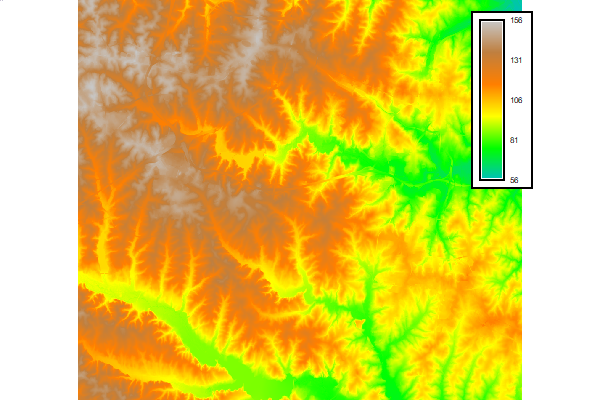

In [3]:
# Create GrassRenderer instance
img = gj.GrassRenderer()
# Add a raster, vector and legend to the map
img.d_rast(map="elevation")
img.d_legend(raster="elevation", at=(55, 95, 80, 84), flags="b")
# Display map
img.show()